## Overveiw

- [Overveiw](#Overveiw)
- [Title](#Title)
- [Author](#Author)
- [Instructor](#Instructor)
- [Introduction](#Introduction)
- [Dataset](#Dataset)
- [Goal](#Goal)
- [Import Libraries](#Import-libraries)
- [Load the Dataset](#Load-the-Dataset)
- [Dataset checking and modifying](#Dataset-checking-and-modifying)
- [Missing values](#Missing-values)
- [Mean or median](#Mean-or-median)
- [Imbalanced dataset](#Imbalanced-dataset)
- [Balanced dataset](#Balanced-dataset)
- [Correlations](#Correlations)
- [Drop unnecessary features](#Drop-unnecessary-features)
- [Training and test dataset](#Training-and-test-dataset)
- [Standardize the Data](#Standardize-the-Data)
- [Confusion matrix](#Confusion-matrix)
- [Models](#Models)
- [Best model](#Best-model)
- [Overfitting](#Overfitting)
- [Cross validation](#Cross-validation)
- [Model Evaluation](#Model-Evaluation)
- [Feature importance](#Feature-importance)
- [Remove Age and Gender](#Remove-Age-and-Gender)
- [Make predictions](#Make-predictions)
- [Possible reasons](#Possible-reasons)
- [Duplicates](#Duplicates)
- [Normal range](#Normal-range)
- [Future direction](#Future-direction)

## Title

Predicting liver disease by using machine learning models

## Author

Cheng-Hsiang Lu

## Instructor

Dr. Baloglu

## Introduction

The liver is the largest solid organ in the human body. It's located mainly in the upper right portion of your abdomen, beneath the diaphragm and above your stomach. The liver carries out over 500 essential tasks. The major functions of liver include: metabolizing bilirubin, fat, and proteins, supporting blood clots, Immunological function, producing albumin, etc. The term “liver disease” refers to any of several conditions that can damage your liver. Over time, liver disease can cause cirrhosis. As more scar tissue replaces healthy liver tissue, the liver can no longer function properly. If left untreated, liver disease can lead to liver failure and liver cancer.

## Dataset

My dataset was found on [Kaggle](https://www.kaggle.com/datasets/abhi8923shriv/liver-disease-patient-dataset). It contains more than 30 thousand data points and 11 features. There are 10 features which are Age, Gender, total Bilirubin, direct Bilirubin, ALP, GPT, GOT, Total Proteins, Albumin, and AG_Ratio. When it comes to liver, expect for Age and Gender, these are the most commonly performed blood tests. There is one target that has two classes: 0 correspond to sample without liver disease and 1 correspond to sample with liver disease.

## Goal

The goal for this project is to predict liver disease by using these data points and features.

## Import Libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

import random

## Load the Dataset

In [2]:
df = pd.read_csv('/Users/samuellu/Desktop/TRGN515/Final_project/Datasets/Liver_Disease_Patient_Dataset_train data_11_30KV/Liver_Disease_Patient_Dataset_train data_11_30K.csv')
df_copy = df.copy()

## Dataset checking and modifying

### convert headers into acronyms 

In [4]:
df_copy = df_copy.rename(columns={'Age of the patient':'Age'})
df_copy = df_copy.rename(columns={'Gender of the patient':'Gender'})
df_copy = df_copy.rename(columns={'Total Bilirubin':'T_B'})
df_copy = df_copy.rename(columns={'Direct Bilirubin':'D_B'})
df_copy = df_copy.rename(columns={'�Alkphos Alkaline Phosphotase':'ALP'})
df_copy = df_copy.rename(columns={'�Sgpt Alamine Aminotransferase':'GPT'})
df_copy = df_copy.rename(columns={'Sgot Aspartate Aminotransferase':'GOT'})
df_copy = df_copy.rename(columns={'Total Protiens':'T_P'})
df_copy = df_copy.rename(columns={'�ALB Albumin':'ALB'})
df_copy = df_copy.rename(columns={'A/G Ratio Albumin and Globulin Ratio':'AG_Ratio'})
df_new = df_copy.rename(columns={'Result':'Target'})
df_new

,Age,Gender,T_B,D_B,ALP,GPT,GOT,T_P,ALB,AG_Ratio,Target
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


### datapoints and features

In [5]:
df_new.shape

(30691, 11)

In [6]:
df_new.columns.values

array(['Age', 'Gender', 'T_B', 'D_B', 'ALP', 'GPT', 'GOT', 'T_P', 'ALB',
       'AG_Ratio', 'Target'], dtype=object)

### change categorical data into numbers

#### female = 0 / male = 1

In [7]:
dict = {'Female':0,'Male':1}
df_new['Gender'] = df_new['Gender'].replace(dict)

#### no liver disease = 0 / liver disease = 1

In [8]:
#1 for liver disease; 0 for no liver disease
dict = {1:1,2:0}
df_new['Target'] = df_new['Target'].replace(dict)
df_new

,Age,Gender,T_B,D_B,ALP,GPT,GOT,T_P,ALB,AG_Ratio,Target
0,65.0,0.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,1.0,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,1.0,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,1.0,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,0.0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


## Missing values

In [9]:
df_new.isnull().sum()

Age           2
Gender      902
T_B         648
D_B         561
ALP         796
GPT         538
GOT         462
T_P         463
ALB         494
AG_Ratio    559
Target        0
dtype: int64

Except for Target, every feature have missing values.

### method 1 : drop every missing values

In [10]:
df_drop = df_new.dropna(how = 'any')

In [11]:
df_drop.isnull().sum()

Age         0
Gender      0
T_B         0
D_B         0
ALP         0
GPT         0
GOT         0
T_P         0
ALB         0
AG_Ratio    0
Target      0
dtype: int64

In [12]:
df_drop.shape

(27158, 11)

If I drop all missing values, 12% of my dataset would disappear.

### method 2 : replace with mean or median

In [14]:
df_rep = df_new.copy()

In [15]:
df_rep.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30689.0,44.107205,15.981043,4.0,32.0,45.0,55.0,90.0
Gender,29789.0,0.738058,0.439699,0.0,0.0,1.0,1.0,1.0
T_B,30043.0,3.370319,6.255522,0.4,0.8,1.0,2.7,75.0
D_B,30130.0,1.528042,2.869592,0.1,0.2,0.3,1.3,19.7
ALP,29895.0,289.075364,238.537589,63.0,175.0,209.0,298.0,2110.0
GPT,30153.0,81.488641,182.158850,10.0,23.0,35.0,62.0,2000.0
GOT,30229.0,111.469979,280.851078,10.0,26.0,42.0,88.0,4929.0
T_P,30228.0,6.480237,1.081980,2.7,5.8,6.6,7.2,9.6
ALB,30197.0,3.130142,0.792281,0.9,2.6,3.1,3.8,5.5
AG_Ratio,30132.0,0.943467,0.323164,0.3,0.7,0.9,1.1,2.8


### datapoints distributions

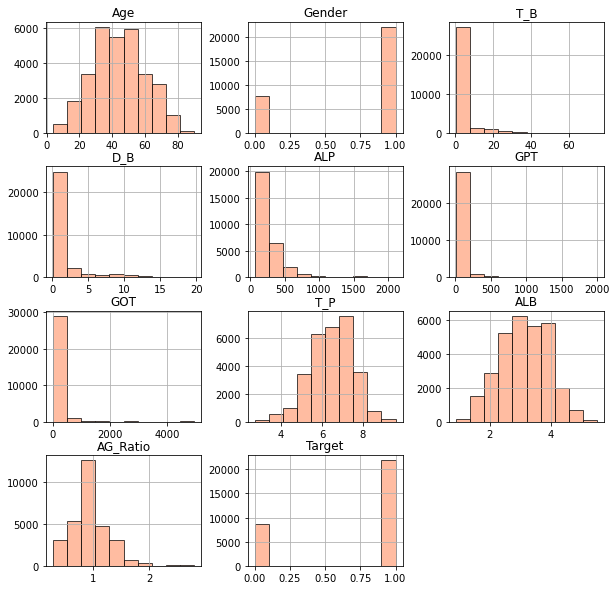

In [16]:
p_rep = df_rep.hist(figsize = (10,10), color="#FFA07A",alpha=0.7, edgecolor = 'black')

# Saving the figure.
# plt.savefig("../Final_project/histogram_all_datapoints.jpg")

From histograms and my description table, I can see that histograms of Age, T_P, ALB, and AG_Ratio look like a normal distribution. So, we can replace their missing values with means. On the other hand, histograms of T_B, D_B, ALP, GPT, GOT look like a skewed distribution. Thus, we can replace their missing value with medians.

## Mean or median

In [17]:
# Age, T_P, ALB, and AG_Ratio replace with mean
df_rep['Age'].fillna((df_rep['Age'].mean()), inplace=True)
df_rep['T_P'].fillna((df_rep['T_P'].mean()), inplace=True)
df_rep['ALB'].fillna((df_rep['ALB'].mean()), inplace=True)
df_rep['AG_Ratio'].fillna((df_rep['AG_Ratio'].mean()), inplace=True)
# T_B, D_B, ALP, GPT, and GOT replace with median
df_rep['T_B'].fillna((df_rep['T_B'].median()), inplace=True)
df_rep['D_B'].fillna((df_rep['D_B'].median()), inplace=True)
df_rep['ALP'].fillna((df_rep['ALP'].median()), inplace=True)
df_rep['GPT'].fillna((df_rep['GPT'].median()), inplace=True)
df_rep['GOT'].fillna((df_rep['GOT'].median()), inplace=True)

In [18]:
df_rep.isnull().sum()

Age           0
Gender      902
T_B           0
D_B           0
ALP           0
GPT           0
GOT           0
T_P           0
ALB           0
AG_Ratio      0
Target        0
dtype: int64

After that, only the gender feature contain missing values. However, I cannot replace them with mean or median because gender is a categorical data. But, based on these missing values of Gender are less than 3% of all data points, I just remove them.

In [19]:
df_rep = df_rep.dropna(how = 'any')
df_rep.isnull().sum()

Age         0
Gender      0
T_B         0
D_B         0
ALP         0
GPT         0
GOT         0
T_P         0
ALB         0
AG_Ratio    0
Target      0
dtype: int64

In [20]:
df_rep.shape

(29789, 11)

## Imbalanced dataset

Then, I take a closer look at my dataset’s target distribution and find out that my dataset is imbalanced. It shows that more than 21 thousand data points have liver disease, but only 8 thousand data points with no liver disease. There is a gap between two groups. The gap could cause inaccuracy for my further analysis. Thus, I decide to reduce the data points in liver disease group to match the number in No liver disease group.

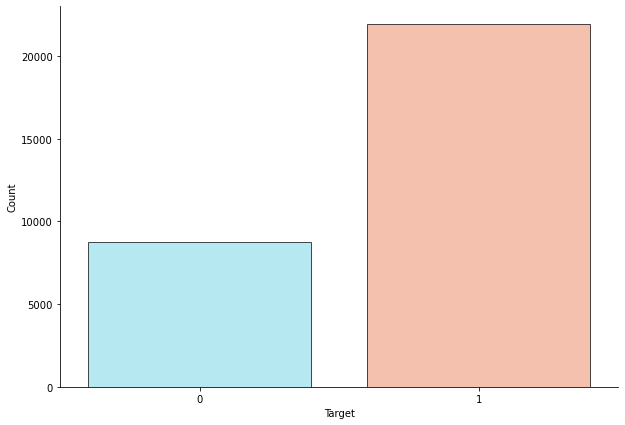

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x='Target', data=df_rep, palette=["#88E9FC", "#FFA07A"], edgecolor="black", alpha=0.7)
 
# Removing the unwanted spines, as in the border lines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Target')
plt.ylabel('Count')

# Saving the figure.
# plt.savefig("../Final_project/check_outcome_numbers.jpg")

plt.show()

First, I split my original data into two group by Target (0 and 1). Second, In the data with liver disease, I use pandas sample function to randomly extract 40% of the data and about 8000 data points are extracted. Then, I merge data with and without liver disease two group into one new dataset (df_8000X8000.csv).

In [21]:
df_1 = pd.read_excel('/Users/samuellu/Desktop/TRGN515/Final_project/Patients_LD_1.xlsx')

In [22]:
df_1_8000 = df_1.sample(frac=0.4, replace=True, random_state=1)

In [23]:
df_0_8000 = pd.read_excel('/Users/samuellu/Desktop/TRGN515/Final_project/Patients_NoLD_0.xlsx')

In [24]:
df_concat = pd.concat([df_1_8000, df_0_8000])

In [25]:
df_concat.to_csv('df_8000X8000.csv', encoding = 'utf-8', index = False)

In [26]:
df_new = pd.read_csv('../Final_project/df_8000X8000.csv')
df_2 = df_new.copy()

## Balanced dataset

After reorganizing them, I visualize my data to see if there are any changes. From the bar plot, It looks like a much more balance dataset. There are about 8,000 data points within each group now.

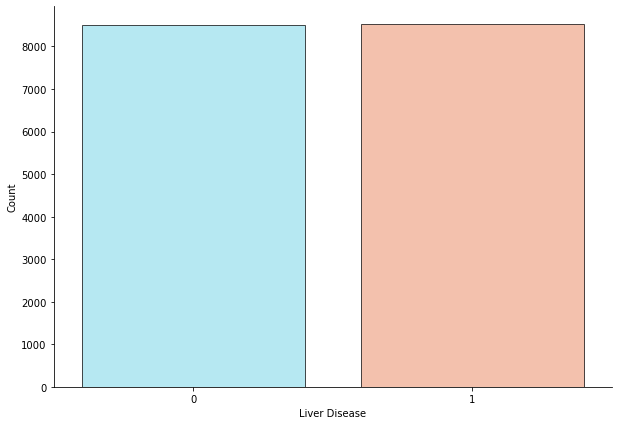

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x='Target', data=df_2, palette=["#88E9FC", "#FFA07A"], edgecolor="black", alpha=0.7)
 
# Removing the unwanted spines, as in the border lines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Headings
plt.xlabel('Liver Disease')
plt.ylabel('Count')

# Saving the figure.
# plt.savefig("../Final_project/check_outcome_numbers.jpg")

plt.show()

I recheck their distributions which look similar to the former ones.

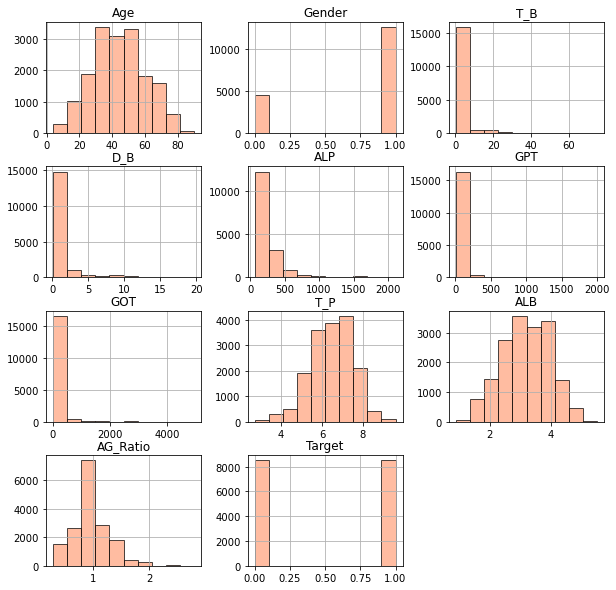

In [28]:
#histograms
p_2 = df_2.hist(figsize = (10,10), color="#FFA07A",alpha=0.7, edgecolor = 'black')

# Saving the figure.
# plt.savefig("../Final_project/adjusted_histogram_all_datapoints.jpg")

In [29]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,17012.0,44.197155,15.925638,4.0,33.0,45.000000,55.0,90.0
Gender,17012.0,0.736304,0.440649,0.0,0.0,1.000000,1.0,1.0
T_B,17012.0,2.707941,5.465526,0.4,0.7,0.900000,1.9,75.0
D_B,17012.0,1.184487,2.534330,0.1,0.2,0.300000,0.8,19.7
ALP,17012.0,265.467141,211.111115,63.0,170.0,200.000000,280.0,2110.0
GPT,17012.0,66.511286,153.373131,10.0,22.0,32.000000,53.0,2000.0
GOT,17012.0,87.850752,215.548111,10.0,24.0,39.000000,70.0,4929.0
T_P,17012.0,6.494810,1.062747,2.7,5.8,6.500000,7.2,9.6
ALB,17012.0,3.184384,0.789251,0.9,2.6,3.130142,3.8,5.5
AG_Ratio,17012.0,0.964132,0.310346,0.3,0.8,1.000000,1.1,2.8


## Correlations

Next thing I want to check correlations between features before I analyze my data. Maybe there are some redundant features that I would like to remove or essential features that I want to keep. In the end, It will improve the performance of my models.

### pairplot

First, a pairplot allows us to see both distribution of single variables and relationships between two variables. Orange dots represent samples with no liver disease and blue dots represent samples with liver. From the pair plot, I can see the linear patterns between T_B and D_B. It suggest a presence of strong correlation between these two features. Therefore, I only have to pick one of the them when I go into further analysis.

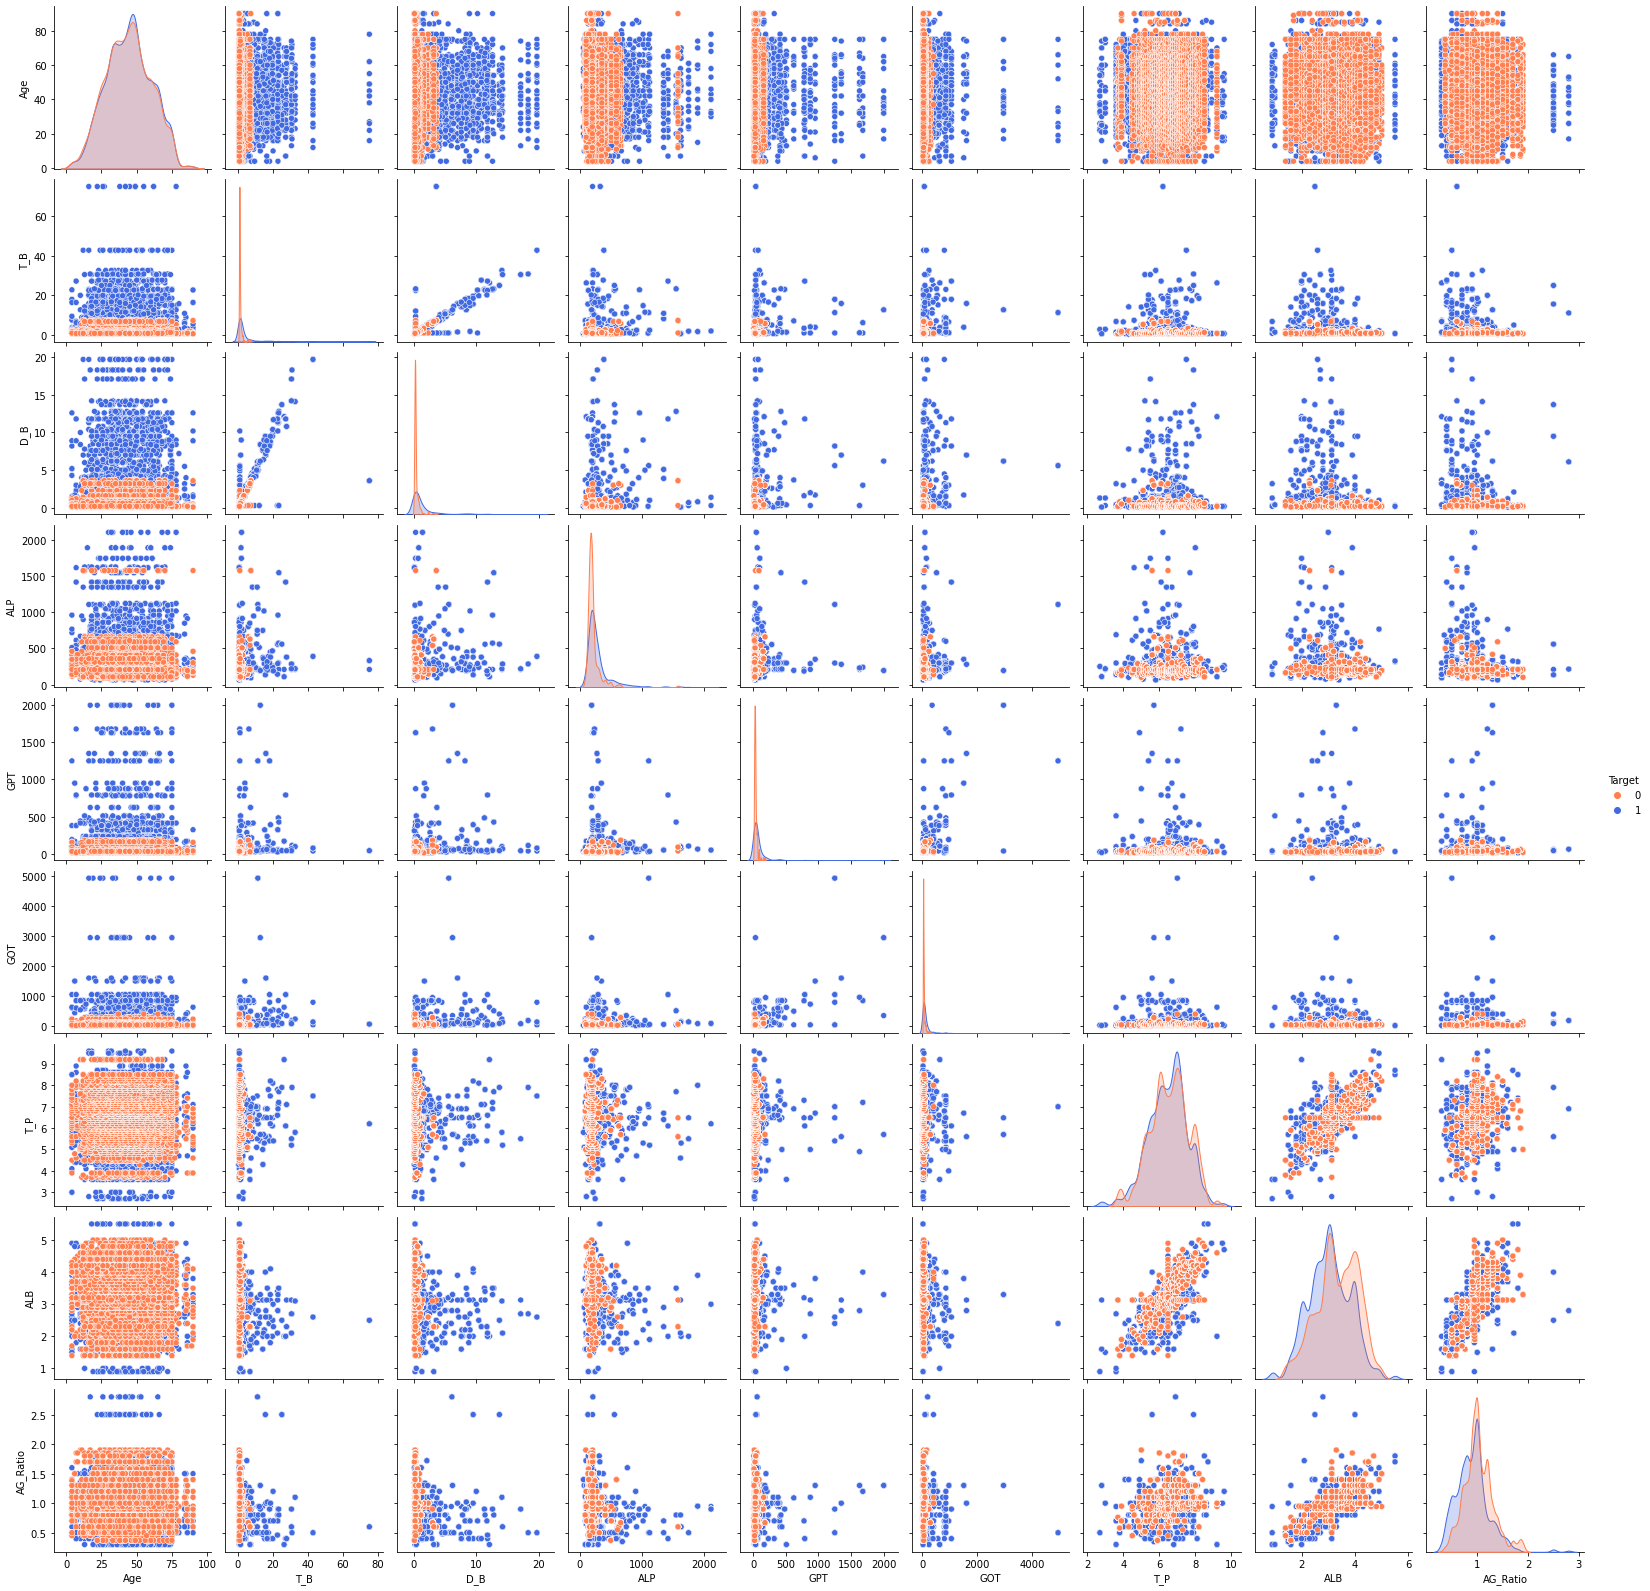

In [30]:
#'Gender'
cols = ['Age',
        'T_B', 
        'D_B', 
        'ALP', 
        'GPT', 
        'GOT', 
        'T_P',
        'ALB', 
        'AG_Ratio', 
        'Target']

sns.pairplot(data=df_2[cols], hue='Target', palette=["#FF7F50", "#4169E1"]) ;

# Saving the figure.
# plt.savefig("../Final_project/pairplot_all_datapoints.jpg")

### heatmap

In this heatmap, a greater correlation shows a darker color and a higher score. There are four areas show strong correlations. The feature of T_B and D_B, GPT and GOT, T_P and ALB, the last one is ALB and AG_Ratio. In the end, I'm going to remove three features: T_B, GPT, and ALB.

<ipython-input-31-27e42c466ec4>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


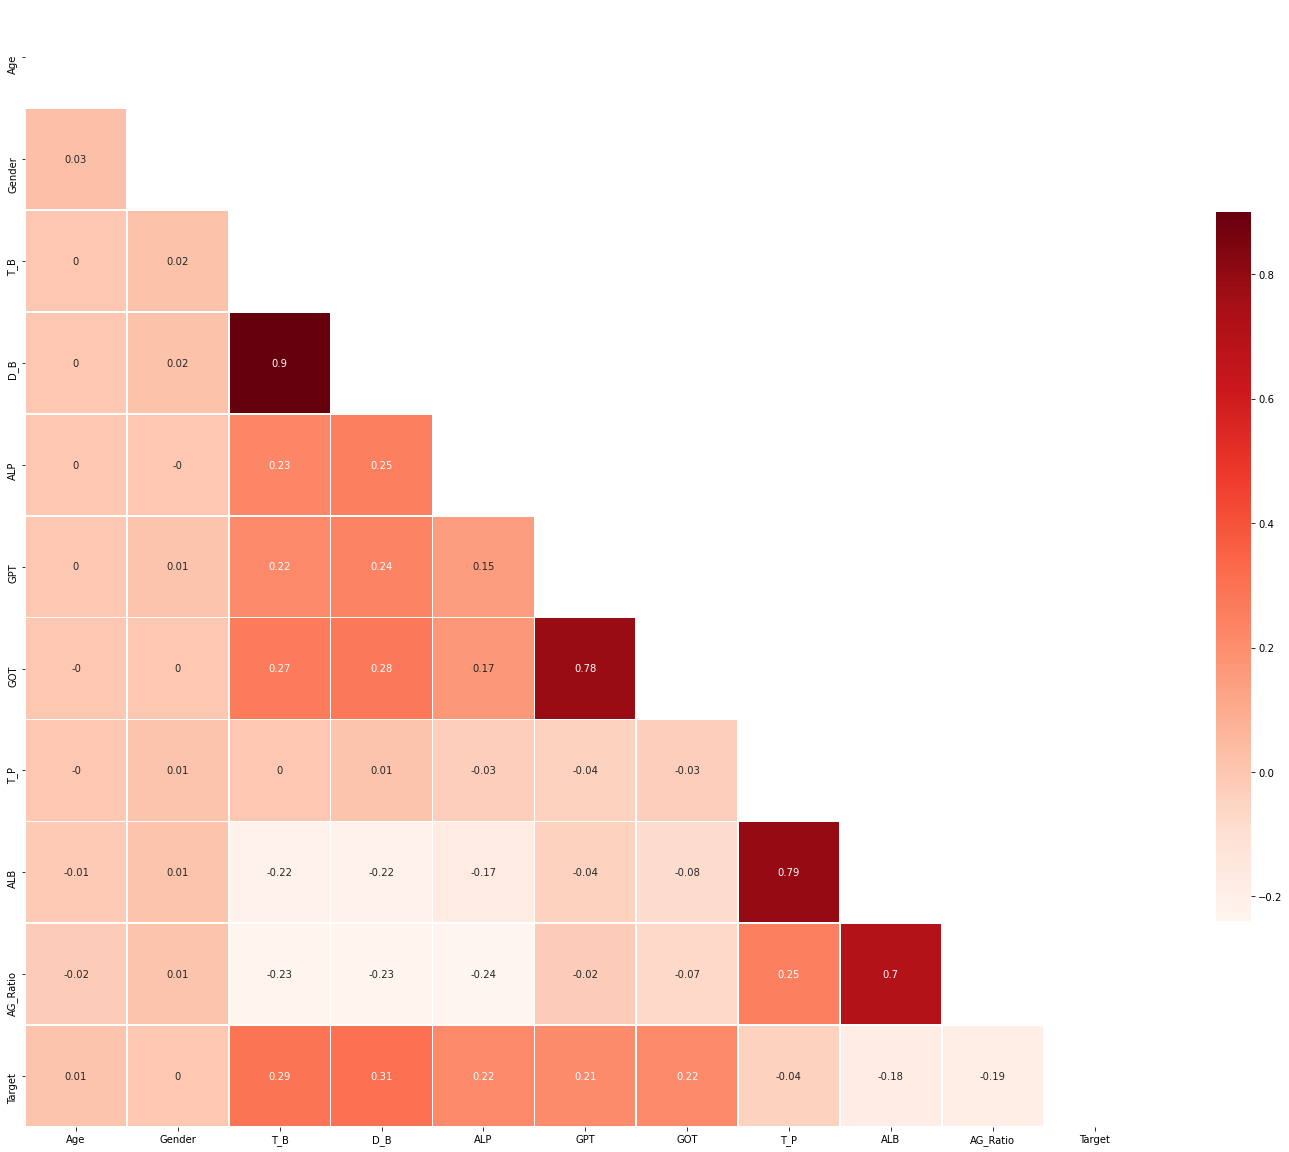

In [31]:
# Generate and visualize the correlation matrix
corr = df_2.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap = sns.color_palette("Reds", as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

# Saving the figure.
# plt.savefig("../Final_project/correlation_matrix_all_datapoints.jpg")

## Drop unnecessary features

After dropping these unnecessary features, there are less obvious linear patterns in the pairplot. The heatmap shows no strong correlation between each feature as well. Initially, I have 10 features. After checking their correlations, I decide to move on with these 7 features which are Age, Gender, D_B, ALP, GOT, T_P, and AG_Ratio.

In [32]:
# drop selected columns
cols = ['T_B', 
        'GPT', 
        'ALB']

df_2_drop = df_2.drop(cols, axis=1)

# verify remaining columns
df_2_drop.columns

Index(['Age', 'Gender', 'D_B', 'ALP', 'GOT', 'T_P', 'AG_Ratio', 'Target'], dtype='object')

After dropping these unnecessary features, there are less obvious linear patterns in the pairplot.

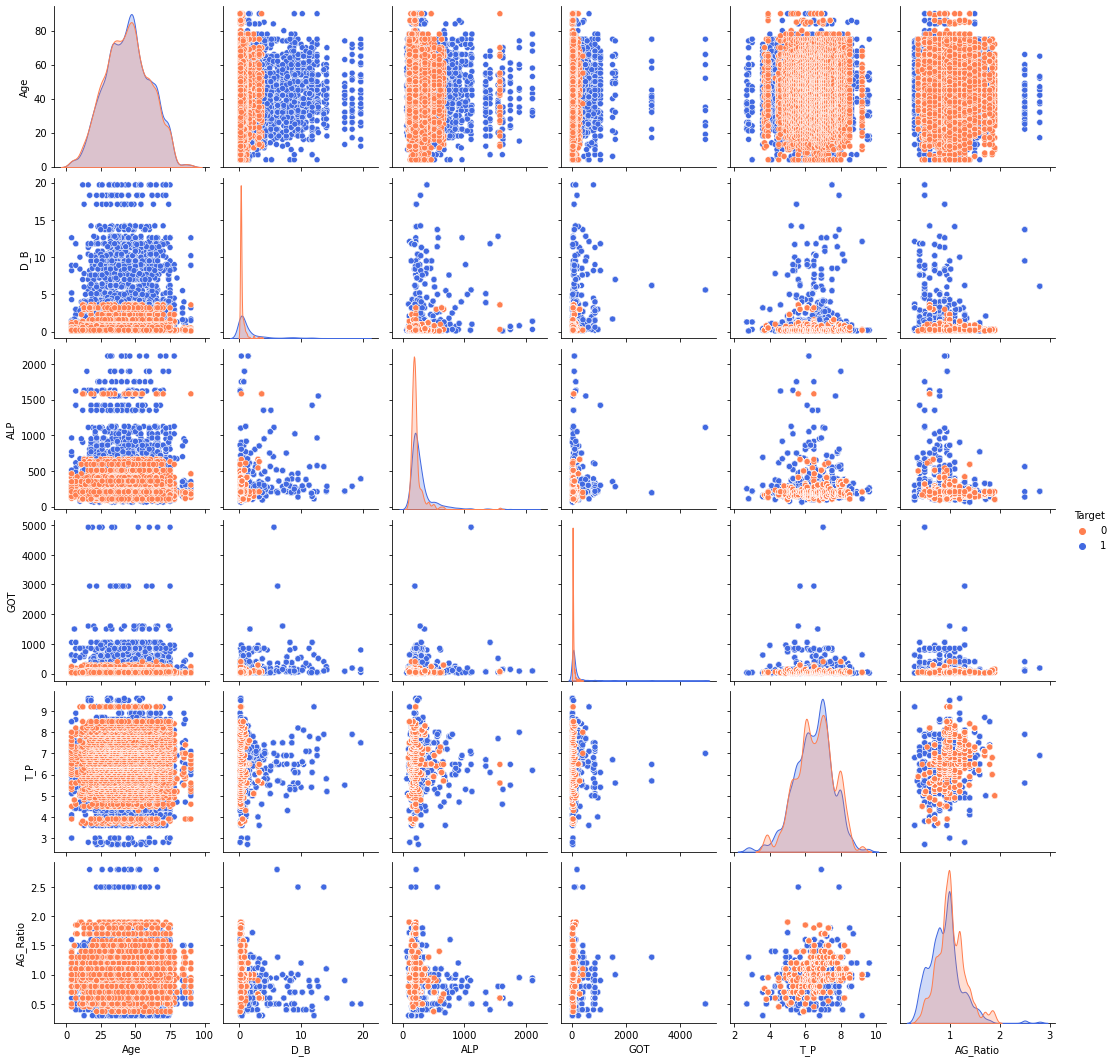

In [33]:
cols = ['Age',
        'D_B', 
        'ALP', 
        'GOT', 
        'T_P',
        'AG_Ratio', 
        'Target']
#Seaborn function is used here to automatically plot the different types of charts for pairs of attributes within the dataset 

sns.pairplot(data=df_2_drop[cols], hue="Target", palette=["#FF7F50", "#4169E1"]);

# Saving the figure.
# plt.savefig("../Final_project/pairplot_reduced_columns.jpg")

The heatmap shows no strong correlation between each feature.

<ipython-input-34-09a0b8c5e2ca>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


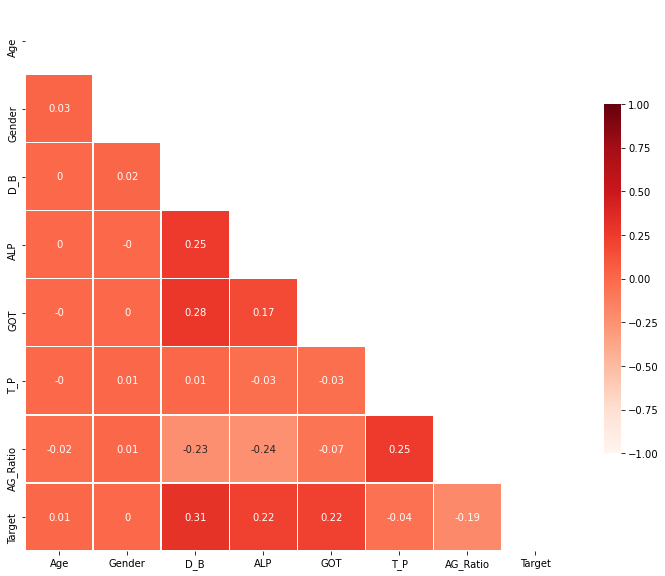

In [34]:
# Draw the heatmap again, with the new correlation matrix
corr = df_2_drop.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.color_palette("Reds", as_cmap=True)
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

# Saving the figure.
# plt.savefig("../Final_project/correlation_matrix_reduced_columns.jpg")

## Training and test dataset

The training dataset is a initial data used to train machine learning models. They’re fed to machine learning algorithms to teach them how to make predictions. The test dataset is a secondary dataset which is used to test machine learning models after is has been trained on a training dataset. Generally, test dataset is used to test your model to see if it is working properly or not. Training and test datasets must not have any overlap, so that test datasets can really measure the capabilities of your models. Normally, people suggest that 70% of the available data is allocated for training set and 30% is allocated for test set. 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df_2_drop[['D_B']], df_2_drop['Target'], test_size = 0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11908, 1) (5104, 1) (11908,) (5104,)


## Standardize the Data

First, I have to standardize my dataset. Fit is the function used on the training dataset only. In order to find the mean, variance, maximum and minimum values of the training dataset, the inherent properties of the training dataset. Transform is the function used on both the training and test dataset. The reason why we use transform function is to scale the data normalize and standardize them.

In [36]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Confusion matrix

Now, I’m going to talk about the confusion matrix. The x-axis shows a predicted label and the y-axis shows a true label. We have positive and negative under our labels.

The upper left corner presents the true negative value. Just like people with no liver diseases and were predicted negative.

The lower right corner presents the true positive value. Like people with liver diseases and were predicted positive.

The upper right corner presents the false positive value. Like people with no liver diseases and were incorrectly predicted positive.

The lower left corner presents the false negative value. Like people with liver diseases and were incorrectly predicted negative.

To calculate the accuracy of the confusion matrix, there is a equation right here. First we add up TN and TP and then divided them by all four parts will get the accuracy score.

## Models

### logistic regression with a single feature

The first model I used is Logistic Regression model. Logistic regression is a process of modeling the probability. The most common logistic regression model is based on binary outputs. For example, like true/false, yes/no, and so on. It is a useful analysis method for the classification problem which is what I have. First, I split my dataset into training and test datasets with training size 70% and test size 30%. Then, I try a single feature by picking a variable (D_B) based on the heatmap score.

The accuracy of test dataset is 66% and the training dataset accuracy is 67%. It is not the ideal score that I want because I only use one feature. Now, I’m going to use logistic regression with all feature in my dataset and build a more complicate model.

In [37]:
clf = LogisticRegression()

In [38]:
clf.fit(X_train, y_train)

LogisticRegression()

In [39]:
score = clf.score(X_test, y_test)
print('testing dataset accuracy: ', score)

testing dataset accuracy:  0.6559561128526645


In [40]:
score_train = clf.score(X_train, y_train)
print('training dataset accuracy: ', score_train)

training dataset accuracy:  0.6691299966409137


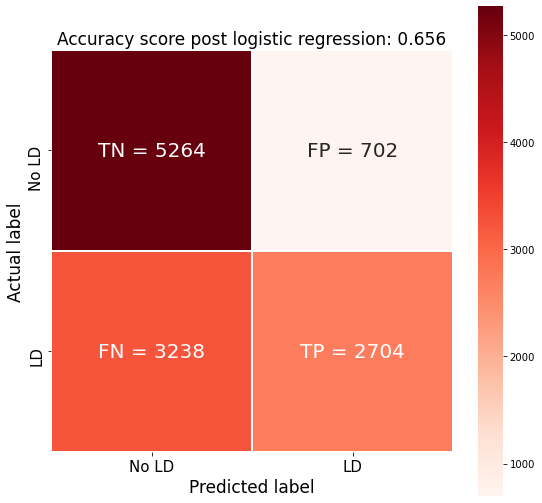

In [42]:
cm = metrics.confusion_matrix(y_train, clf.predict(X_train))

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap=cmap,
            xticklabels = ['No LD', 'LD'],
            yticklabels = ['No LD', 'LD'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy score post logistic regression: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

### logistic regression with all features

When I use logistic regression with all features, the accuracy of test dataset increases from 66% to 71% and the training dataset accuracy also increases from 67% to 71%. However, it is still not the best score. Therefore, I’m going to find out the best model by comparing different models all together.

In [43]:
# let's pick an explanatory variable based on the seaborn plot, ex : Direct Bilirubin or A/G ration
X_train, X_test, y_train, y_test = train_test_split(df_2_drop[['Age','Gender','D_B','ALP','GOT','T_P','AG_Ratio']], df_2_drop['Target'], test_size = 0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11908, 7) (5104, 7) (11908,) (5104,)


In [44]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
clf = LogisticRegression()

In [46]:
clf.fit(X_train, y_train)

LogisticRegression()

In [47]:
score = clf.score(X_test, y_test)
print('testing dataset accuracy: ', score)

testing dataset accuracy:  0.690242946708464


In [48]:
score_train = clf.score(X_train, y_train)
print('training dataset accuracy: ', score_train)

training dataset accuracy:  0.7044843802485724


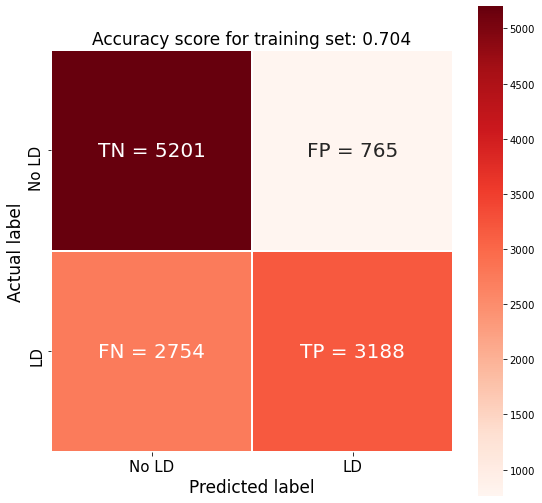

In [49]:
cm = metrics.confusion_matrix(y_train, clf.predict(X_train))

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap=cmap,
            xticklabels = ['No LD', 'LD'],
            yticklabels = ['No LD', 'LD'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy score for training set: {:.3f}'.format(score_train), size = 17);
plt.tick_params(labelsize= 15)

### find best model

This time, I’ll compare logistic regression, decision tree, and Random forest.

### decision tree

The decision tree is a supervised machine learning model. It is like a tree, branching from the root to the trunk to the leaves. The part of each node is a feature. A step-by-step breakdown of features will yield outputs on whether patients have liver disease or not.

### random forest

Random forest is a supervised machine learning algorithm that is used widely in classification and regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression. For example, in this figure, there are total 9 decision trees, 6 of them predict 1 and 3 of them predict 0. So, the most votes 1 becomes the model’s prediction. 

In [50]:
from sklearn.model_selection import train_test_split

X = df_2_drop.drop(columns='Target')
y = df_2_drop['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (11908, 7), X_test size: (5104, 7)


In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(min_samples_leaf = 50, min_samples_split = 50,splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10,20]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(min_samples_leaf = 50, min_samples_split = 50, criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200],
                'max_depth': [5,6,7,8,9,10,15,20,30]
            }
        },

    }
    
    scores = [] 
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.705156
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 20}",0.873783
2,random_forest,"{'max_depth': 30, 'n_estimators': 100}",0.887302


## Best model

After checking with these three models, I found that the random forest model has the highest accuracy. Its accuracy is 88% which is higher than logistic regression and decision tree. I can also see that decision tree and random forest have a much higher score than the logistic regression. But, it’s known that with tree-based models, the score I get may be due to a so-called overfitting problem. I have to double check whether the relatively high score is due to the overfitting issue.

## Overfitting

Overfitting is over-learning the training data, and it becomes hard to predict other data that is not in the training dataset. Any model perform too well on the training dataset but the performance drops significantly over the test dataset.

As the model complexity increases, we can reduce the training error but simultaneously increases the test error.

## Cross validation

By using cross validation, we can detect overfitting problem. Cross validation is a technique for evaluating machine learning models by training several models on subsets of the available input data and evaluating them on the complementary subset of the data. There are different types of Cross Validation Techniques, but the overall concept remains the same.

The first step is to partition the data into a number of subsets, in this case, there are 9 subsets.

Second, Hold out a set at a time and train the model on remaining set, the set in yellow is the hold-out set.

Third, test the model on hold-out set.

The last step is to repeat the process for each subset of the dataset.

In the end, my average of Accuracy is 88%.

In [54]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=200, min_samples_leaf = 50, min_samples_split = 50, random_state=42), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 88%


## Model Evaluation

After using cross validation, I evaluate the performance of my model. The accuracy of test dataset is 90% and the accuracy of training dataset is 91.8%. The higher score that I got from the training dataset is almost 4% higher than the Average Accuracy of cross validation

In [55]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=200,min_samples_leaf = 50, min_samples_split = 50, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=50, min_samples_split=50,
                       n_estimators=200, random_state=42)

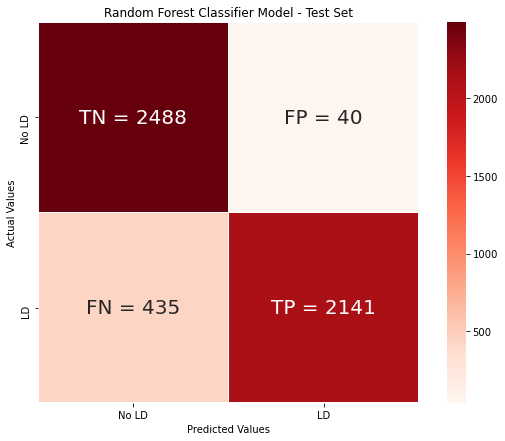

In [56]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap=cmap,
            xticklabels = ['No LD', 'LD'],
            yticklabels = ['No LD', 'LD'],
            );

plt.title('Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [57]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 90.69%


In [80]:
# Classification Report
# print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.91      2528
           1       0.96      0.84      0.89      2576

    accuracy                           0.90      5104
   macro avg       0.91      0.90      0.90      5104
weighted avg       0.91      0.90      0.90      5104



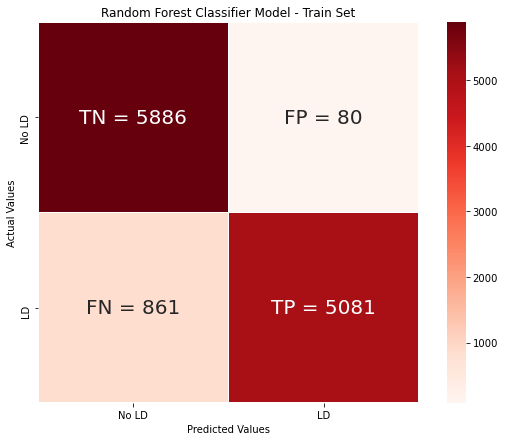

In [58]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap=cmap,
            xticklabels = ['No LD', 'LD'],
            yticklabels = ['No LD', 'LD'],
            );

plt.title('Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [59]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 92.10000000000001%


In [84]:
# Classification Report
# print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      5966
           1       0.97      0.86      0.91      5942

    accuracy                           0.92     11908
   macro avg       0.92      0.92      0.92     11908
weighted avg       0.92      0.92      0.92     11908



## Feature importance

The next thing I would like to do is to rank my features and see which one is more important. I use random forest to rank my features. The reason why I want to do that is to see if some features are not that important, then I can remove them and improve my accuracy. We can see that ALP, GOT, D__B, T_P, and AG_Ratio are the top five important features in my dataset. On the other hand, Age and Gender are not that essential. Thus, I decide to remove these two features.

 1) GOT                            0.243800
 2) ALP                            0.242611
 3) D_B                            0.176172
 4) T_P                            0.173665
 5) AG_Ratio                       0.141903
 6) Age                            0.019399
 7) Gender                         0.002451


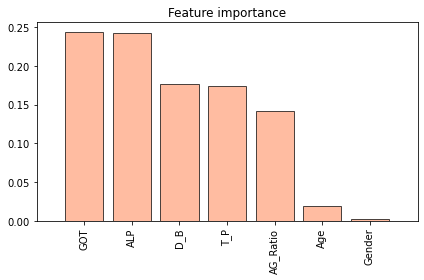

In [60]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_2_drop.columns[:-1]

classifier = RandomForestClassifier(n_estimators=200,
                                random_state=42)

classifier.fit(X_train, y_train)
importances = classifier.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center',
       color = "#FFA07A", alpha = 0.7, edgecolor = "black")

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig('../Figures/LD_features_ranked.png', dpi=300)
plt.show()

## Remove Age and Gender

After removing the feature age and gender, the cross validation average Accuracy slightly increases to 91% and the accuracy of test dataset is still around 90%. Last, the accuracy of training dataset slightly increases to 94%. So, by removing age and gender, my training dataset accuracy is improved. Then, I’m going to use this model to predict new data which is obtain from my former co-work who currently work in the hospital.

In [62]:
# drop selected columns
cols = ['Age', 
        'Gender']

df_5_col = df_2_drop.drop(cols, axis=1)

# verify remaining columns
df_5_col.columns

Index(['D_B', 'ALP', 'GOT', 'T_P', 'AG_Ratio', 'Target'], dtype='object')

In [63]:
from sklearn.model_selection import train_test_split

X = df_5_col.drop(columns='Target')
y = df_5_col['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (11908, 5), X_test size: (5104, 5)


In [64]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(min_samples_leaf = 50, min_samples_split = 50, splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10,20]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(min_samples_leaf = 50, min_samples_split = 50, criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200],
                'max_depth': [5,6,7,8,9,10,15,20,30]
            }
        },

    }
    
    scores = [] 
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], return_train_score=True)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
            
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.703896
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 20}",0.874287
2,random_forest,"{'max_depth': 30, 'n_estimators': 200}",0.914511


In [67]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestClassifier(n_estimators=200, min_samples_leaf = 50, min_samples_split = 50, random_state=42), X_train, y_train, cv=5)
print('Average Accuracy : {}%'.format(round(sum(scores)*100/len(scores)), 3))

Average Accuracy : 91%


In [68]:
# Creating Random Forest Model
classifier = RandomForestClassifier(n_estimators=200,min_samples_leaf = 50, min_samples_split = 50, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=50, min_samples_split=50,
                       n_estimators=200, random_state=42)

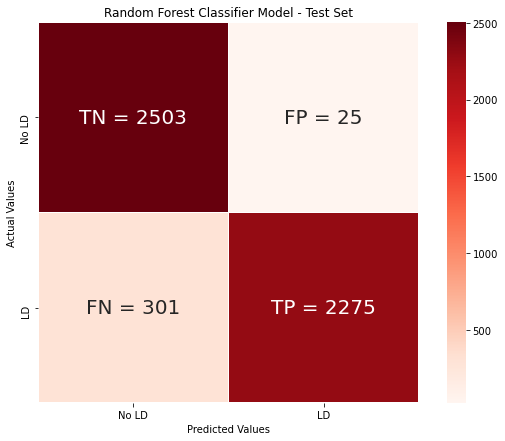

In [69]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap=cmap,
            xticklabels = ['No LD', 'LD'],
            yticklabels = ['No LD', 'LD'],
            );

plt.title('Random Forest Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [70]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred),4)*100
print("Accuracy on test set: {}%".format(score))

Accuracy on test set: 93.61%


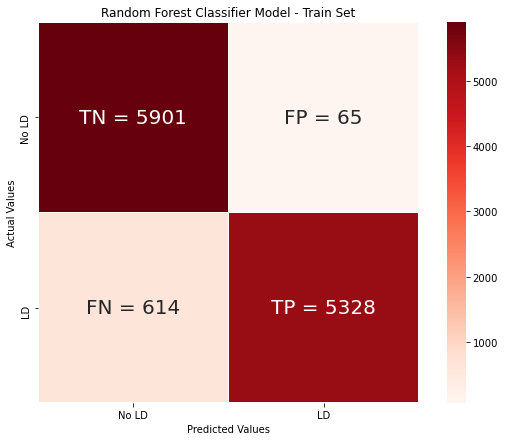

In [71]:
# Creating a confusion matrix for training set
y_train_pred = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_train_pred)
cm

modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap=cmap,
            xticklabels = ['No LD', 'LD'],
            yticklabels = ['No LD', 'LD'],
            );

plt.title('Random Forest Classifier Model - Train Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [72]:
# Accuracy Score
score = round(accuracy_score(y_train, y_train_pred),4)*100
print("Accuracy on trainning set: {}%".format(score))

Accuracy on trainning set: 94.3%


 1) GOT                            0.260036
 2) ALP                            0.257927
 3) D_B                            0.232132
 4) T_P                            0.129771
 5) AG_Ratio                       0.120134


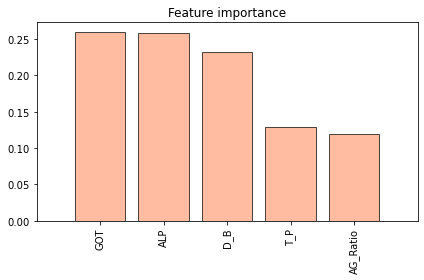

In [73]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_5_col.columns[:-1]

classifier = RandomForestClassifier(n_estimators=200, min_samples_leaf = 50, min_samples_split = 50, random_state=42)

classifier.fit(X_train, y_train)
importances = classifier.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center',
       color = "#FFA07A", alpha = 0.7, edgecolor = "black")

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('../Figures/LD_features_ranked.png', dpi=300)
plt.show()

## Make predictions

The first two samples’ blood tests are obtained from my co-workers themselves who are both healthy and the last two samples’ blood tests are gained from people with slightly abnormal liver function, but they still consider healthy. However, all results show that they might have liver disease.

In [74]:
# Creating a function for prediction
def predict_LD(ALP, GOT, D_B, T_P, AG_Ratio):
    ALP = float(ALP)
    GOT = float(GOT)
    D_B = float(D_B)
    T_P = float(T_P)
    AG_Ratio = float(AG_Ratio)
#     Age = int(Age)
#     Gender = int(Gender)


    x = [[ALP, GOT, D_B, T_P, AG_Ratio]]
    x = sc.transform(x)

    return classifier.predict(x)

In [75]:
# co-worker 1
# Input sequence: ALP, GOT, D_B, T_P, AG_Ratio
prediction = predict_LD(62.0, 24.0, 0.12, 7.1, 1.95)[0]
print(prediction)
if prediction:
  print('You may have potential liver disease. Go see a doctor.')
else:
  print("Your status looks good.")

1
You may have potential liver disease. Go see a doctor.


In [76]:
# co-worker 2
# Input sequence: ALP, GOT, D_B, T_P, AG_Ratio
prediction = predict_LD(68.0, 17.0, 0.1, 7.9, 1.54)[0]
print(prediction)
if prediction:
  print('You may have potential liver disease. Go see a doctor.')
else:
  print("Your status looks good.")

1
You may have potential liver disease. Go see a doctor.


In [77]:
# patient 1 
# Input sequence: ALP, GOT, D_B, T_P, AG_Ratio
prediction = predict_LD(79, 22, 0.24, 8.0, 0.967)[0]
print(prediction)
if prediction:
  print('You may have potential liver disease. Go see a doctor.')
else:
  print("Your status looks good.")

1
You may have potential liver disease. Go see a doctor.


In [78]:
# patient 2 
# Input sequence: ALP, GOT, D_B, T_P, AG_Ratio
prediction = predict_LD(81, 11, 0.23, 7, 1.7)[0]
print(prediction)
if prediction:
  print('You may have potential liver disease. Go see a doctor.')
else:
  print("Your status looks good.")

1
You may have potential liver disease. Go see a doctor.


In [130]:
#normal range

# D_B: 0.3 milligrams per deciliter (mg/dL)
# ALP: 44-147 international units per liter
# GOT: 8-45 international units per liter
# T_P: 6-8.3 grams per deciliter (g/dL)
# AG_Ratio: 1.1-2.5

## T_B: 1.2 milligrams per deciliter (mg/dL)
## GPT: 7-56 international units per liter
## ALB: 3.4-5.4 grams per deciliter (g/dL)
#A/G ratio= (Albumin Level)/(Total Protein - Albumin)

In [80]:
df_NoLD = pd.read_excel('../Final_project/Patients_NoLD_0.xlsx')
df_NoLD.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8494.0,43.981045,15.961680,4.00,32.0,45.0,55.0,90.0
Gender,8494.0,0.735107,0.441302,0.00,0.0,1.0,1.0,1.0
T_B,8494.0,1.137721,0.990998,0.50,0.7,0.8,1.1,7.3
D_B,8494.0,0.392418,0.510123,0.10,0.2,0.2,0.3,3.6
ALP,8494.0,219.468684,138.727385,90.00,162.0,188.0,211.0,1580.0
GPT,8494.0,33.671651,24.602851,10.00,20.0,28.0,37.0,181.0
GOT,8494.0,41.001060,36.491476,10.00,22.0,29.0,44.0,400.0
T_P,8494.0,6.533695,1.056174,3.70,5.9,6.6,7.3,9.2
ALB,8494.0,3.328190,0.776375,1.40,2.9,3.3,4.0,5.0
AG_Ratio,8494.0,1.022899,0.284947,0.37,0.9,1.0,1.2,1.9


## Possible reasons

I have listed three common possible reasons for incorrect predictions.

First, the most common reason for incorrect prediction is the imbalanced dataset. To be more specific, if one group is 100 fold greater than the other group, it could be possible that my model only select one certain group to go through the train and test process. So, the training and test scores are always high but didn’t work well with data from other dataset. However, I have modified my dataset with the same amount of data points in two groups. Therefore, it is not likely to be the reason.

Second, it could be the overfitting problem. I found that some people discuss in stack over flow mention that the best models have high accuracy on training data and equally high accuracy on test data. Plus, both accuracy metrics are not more than 5~10% of each other, which shows model stability. The lower difference the better. So I quickly review my test and training accuracy score. The test dataset accuracy is 90% and the training dataset accuracy is 94%. Although the accuracy of my model looks like it fit the definition of a good model, a simple definition of overfitting is “when a model is no longer as accurate as we want it to be on data we care about.” So, here comes the last possible reason.

If you have duplicates in your training and test datasets, it’s expected to have high accuracies. When you have duplicates in the training dataset, it is effectively the same as having its 'weight' doubled. That element becomes twice as important when the classifier is fitting your data and the classifier becomes biased towards correctly classifying that particular scenario over others. When you have duplicates in the test dataset, you'll get an inflated sense of how well the model performs overall. Because the rarer scenarios are less well represented, and the classifier's poor performance with them will contribute less to the overall test score.



## Duplicates

After removing Age and Gender, within different groups, all features are showed exact the same. It might cause the model keep learning from the same training data and increasing the weight. It also inflated the score of test dataset accuracy due to these duplicates. However, the model have not encountered any new data with different values. In the end, it predict incorrectly.

## Normal range

From my personal point of view, There is another possible reason which is the different normal range of each feature. For example, the figure below is the description of non-liver disease group. The most important feature in my dataset is ALP. However, the mean of ALP is 219 and the median of ALP is 188 while the actual normal range in reality is 44-147. So as the third important feature D_B. Its mean is 0.39 while the actual normal range in reality is below 0.3. Therefore, it may cause an issue when comparing with true normal range.

## Future direction

For my future direction, first thing I could do is to remove those duplicates in my dataset since it has already affected my prediction.

Second, I can try to obtain real dataset from my former co-workers if possible. Then, I would like to include more features that is correlated with liver disease, such as Gamma-glutamyltransferase (GGT), L-lactate dehydrogenase (LD), Prothrombin time (PT), 5'-nucleotidase, etc.

Last but not least, I would like to try more models since I just used Logistic regression with single and multiple features, decision tree and random forest In this final project. However, there are still plenty of other machine learning methods that I can explore with.